# Data Visualization

# Histograms

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

In [2]:
#stats
from scipy import stats

In [7]:
#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
dataset1=randn(100)

(array([  2.,   5.,  11.,  18.,  23.,  18.,  16.,   4.,   1.,   2.]),
 array([-2.65808426, -2.12041567, -1.58274708, -1.0450785 , -0.50740991,
         0.03025868,  0.56792726,  1.10559585,  1.64326443,  2.18093302,
         2.71860161]),
 <a list of 10 Patch objects>)

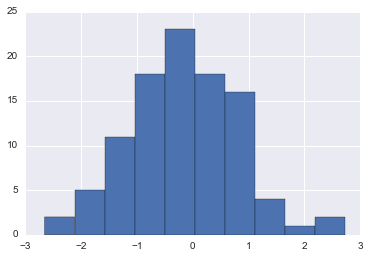

In [8]:
plt.hist(dataset1)

(array([  2.,   5.,  11.,  18.,  23.,  18.,  16.,   4.,   1.,   2.]),
 array([-2.65808426, -2.12041567, -1.58274708, -1.0450785 , -0.50740991,
         0.03025868,  0.56792726,  1.10559585,  1.64326443,  2.18093302,
         2.71860161]),
 <a list of 10 Patch objects>)

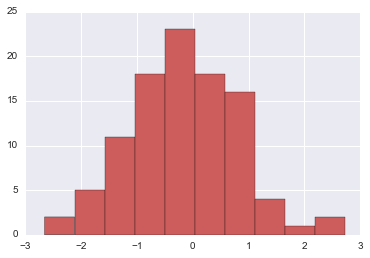

In [9]:
dataset2=randn(80)

plt.hist(dataset1, color='indianred')

(array([ 0.05193611,  0.10387222,  0.05193611,  0.05193611,  0.20774443,
         0.20774443,  0.25968054,  0.41548886,  0.72710551,  0.36355276,
         0.20774443,  0.36355276,  0.20774443,  0.46742497,  0.05193611,
         0.15580832,  0.10387222,  0.        ,  0.10387222,  0.05193611]),
 array([-2.46489342, -2.22421308, -1.98353274, -1.7428524 , -1.50217207,
        -1.26149173, -1.02081139, -0.78013106, -0.53945072, -0.29877038,
        -0.05809005,  0.18259029,  0.42327063,  0.66395097,  0.9046313 ,
         1.14531164,  1.38599198,  1.62667231,  1.86735265,  2.10803299,
         2.34871332]),
 <a list of 20 Patch objects>)

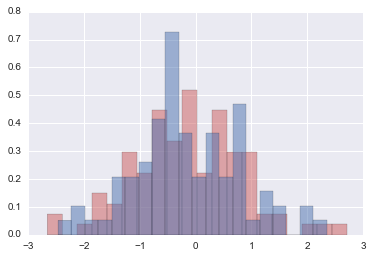

In [12]:
plt.hist(dataset1,normed=True, color='indianred', alpha=0.5, bins=20)
plt.hist(dataset2,normed=True, alpha=0.5, bins=20)

In [13]:
data1=randn(1000)
data2=randn(1000)

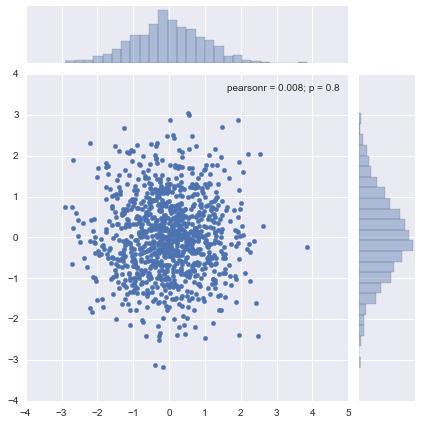

In [14]:
###joint distribution
sns.jointplot(data1,data2)

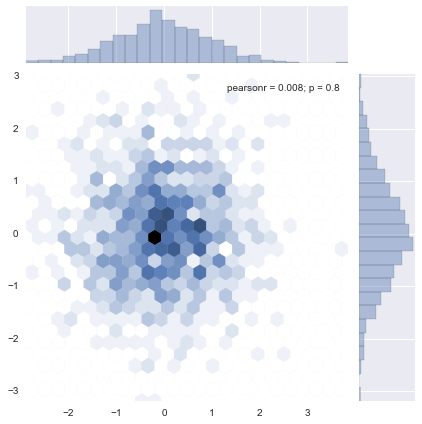

In [15]:
sns.jointplot(data1,data2, kind='hex')  ##hex plot

# Kernel Density Estimation

In [16]:
##the normal imports
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

#stats
from scipy import stats

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#command so that plots appear in the ipython notebool
%matplotlib inline

In [17]:
dataset=randn(25)

(0, 1)

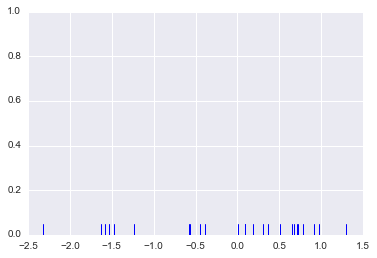

In [19]:
sns.rugplot(dataset) ## returns a line "tick" whenever the value appear in the dataset
plt.ylim(0,1) ###range of the tick

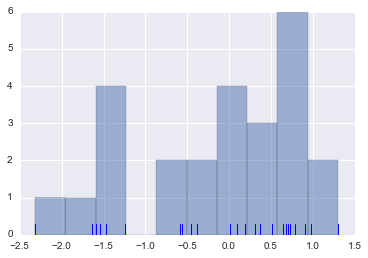

In [20]:
plt.hist(dataset, alpha=0.5)  ##alpha for transparency
sns.rugplot(dataset)

(0, 1)

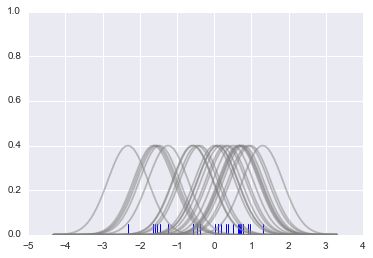

In [24]:
sns.rugplot(dataset)

x_min=dataset.min()-2
x_max=dataset.max()+2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)



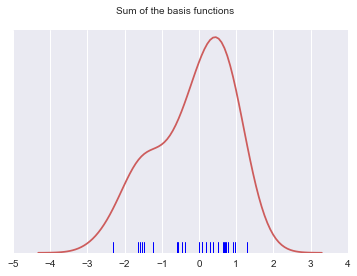

In [32]:
# To get the kde plot we can sum these basis functions.



# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])
plt.suptitle("Sum of the basis functions")

In [28]:
stats.norm(1,bandwidth).pdf(x_axis).max()

0.73642885395465829

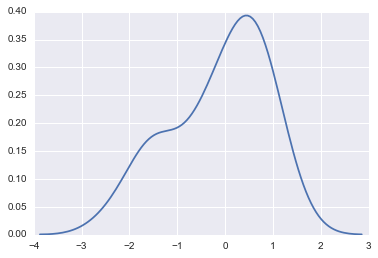

In [33]:
###we could do the same think with just one step by using Seaborn !!!

sns.kdeplot(dataset)

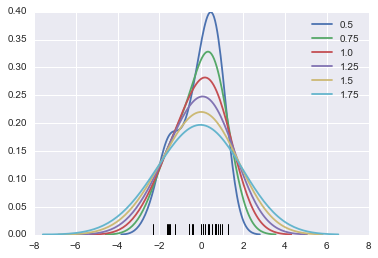

In [34]:
# We can adjust the bandwidth of the sns kde to make the kde plot more or less sensitive to high frequency

# Rugplot
sns.rugplot(dataset,color='black')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

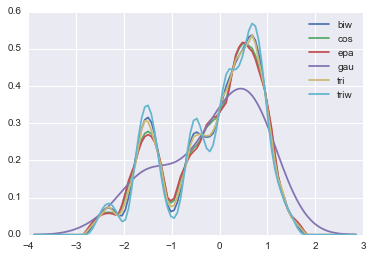

In [35]:
# We can also choose different kernels

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

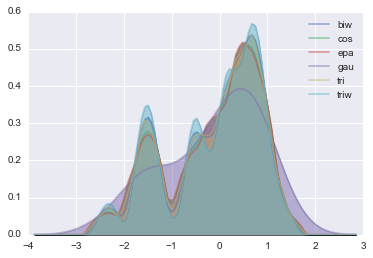

In [36]:
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

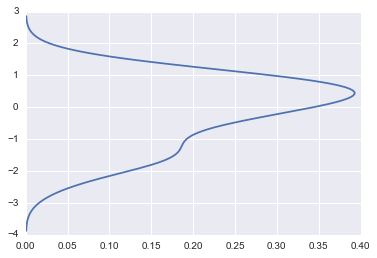

In [37]:
# For vertical axis, use the vertical keyword
sns.kdeplot(dataset,vertical=True)

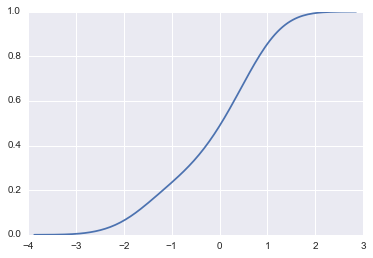

In [38]:
# Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data

# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(dataset,cumulative=True)

### Multivariate Density Estimation using kdeplot¶
We can also use kdeplot for multidimensional data. Lets see how it works!

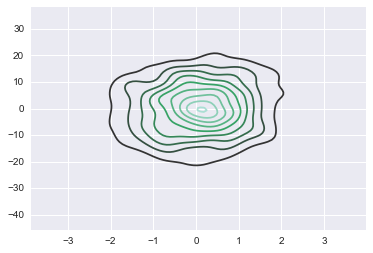

In [39]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(dframe)


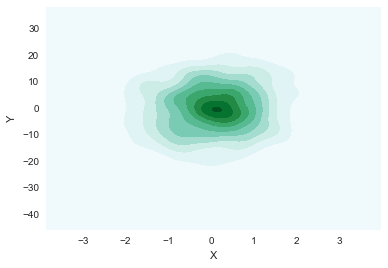

In [40]:
# We could have also passed two vectors seperately, and shade
sns.kdeplot(dframe.X,dframe.Y,shade=True)

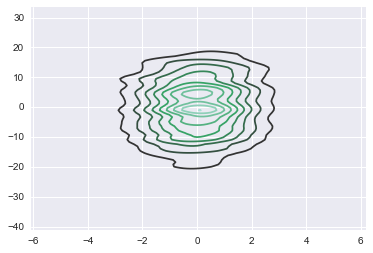

In [42]:
# Can specify a particualr bandwidth
sns.kdeplot(dframe,bw=1)

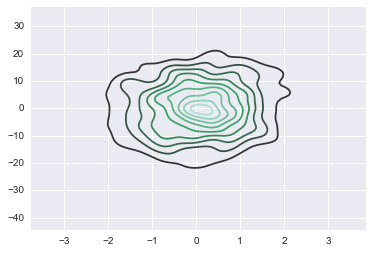

In [43]:
# Or just use silverman again
sns.kdeplot(dframe,bw='silverman')

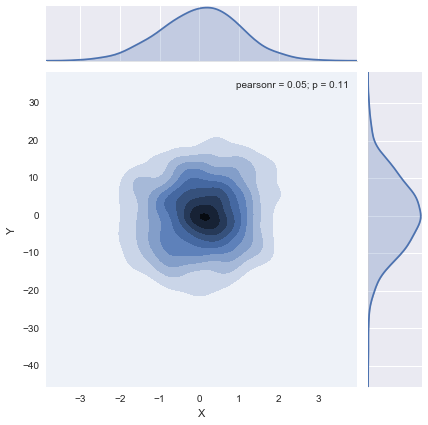

In [44]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before

sns.jointplot('X','Y',dframe,kind='kde')

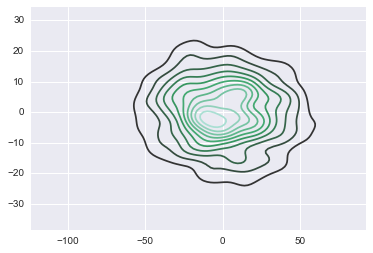

In [51]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[600,0.5],[0.5,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(dframe)

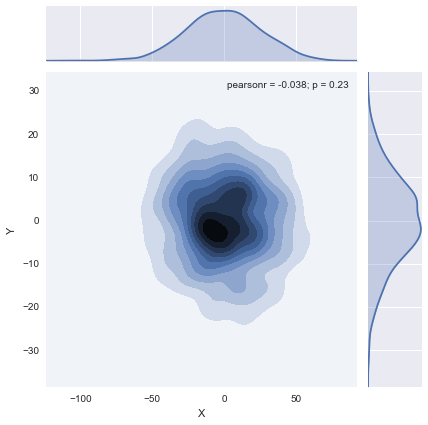

In [52]:

sns.jointplot('X','Y',dframe,kind='kde')

# Combining Plot Styles

In [53]:
##the normal imports
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

#stats
from scipy import stats

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#command so that plots appear in the ipython notebool
%matplotlib inline

In [54]:
# Now we'l learn how to combine plot styles

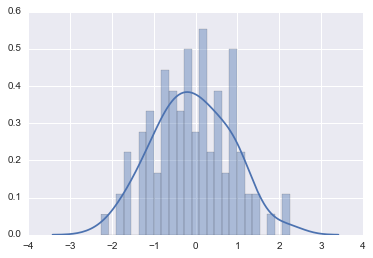

In [55]:
# Create datset
dataset = randn(100)

# Use distplot for combining plots, by default a kde over a histogram is shown
sns.distplot(dataset,bins=25)

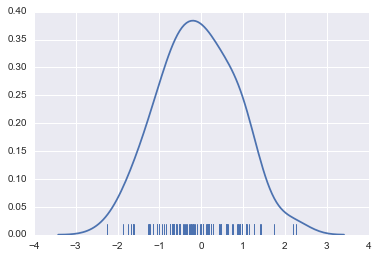

In [56]:
# hist, rug, and kde are all input arguments to turn those plots on or off
sns.distplot(dataset,rug=True,hist=False)

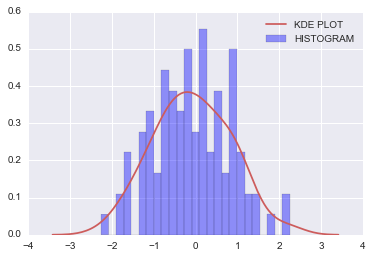

In [57]:
# TO control specific plots in distplot, use [plot]_kws argument with dictionaries.

#Here's an example

sns.distplot(dataset,bins=25,
             kde_kws={'color':'indianred','label':'KDE PLOT'},
             hist_kws={'color':'blue','label':"HISTOGRAM"})

In [58]:
# WE can also use pandas data objects for this

from pandas import Series

# Create Series form dataset
ser1 = Series(dataset,name='My_DATA')


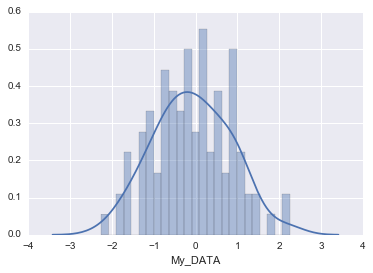

In [60]:
# Plot Series
sns.distplot(ser1,bins=25)

# Box and Violin Plots

In [61]:
# Now we'll learn about box and violin plots
url = 'http://en.wikipedia.org/wiki/Box_plot#mediaviewer/File:Boxplot_vs_PDF.svg'

# Let's create two distributions
data1 = randn(100)
data2 = randn(100) + 2 # Off set the mean

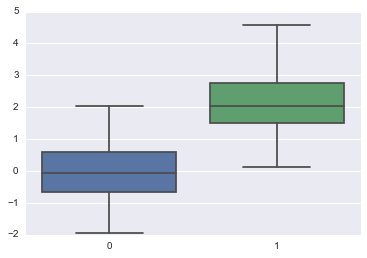

In [76]:
sns.boxplot( data=[data1, data2])



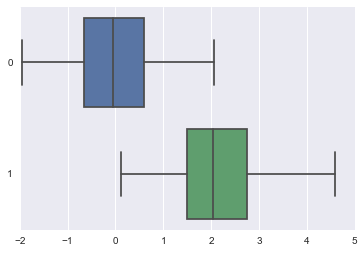

In [77]:
sns.boxplot( data=[data1, data2], vert=False)

In [78]:
# While box plots are great, they can sometimes not give the full picture

# Violin/Viola plots can combine the simplicity of a box plot with the information of a kde plot

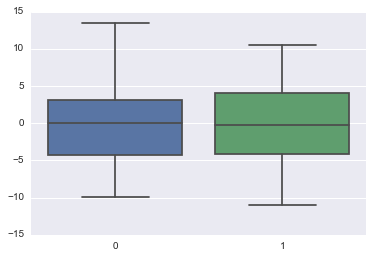

In [80]:
# Let's create an example where a box plot doesn't give the whole picture

# Normal Distribution
data1 = stats.norm(0,5).rvs(100)

# Two gamma distributions concatenated together (Second one is inverted)
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)])

# Box plot them
sns.boxplot(data=[data1,data2],whis=np.inf)

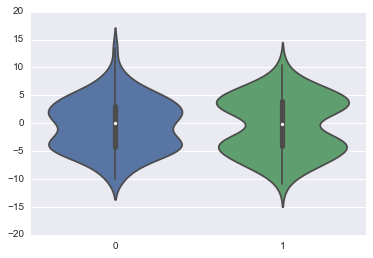

In [82]:
# From the above plots, you may think that the distributions are fairly similar
# But lets check out what a violin plot reveals
sns.violinplot(data=[data1,data2])

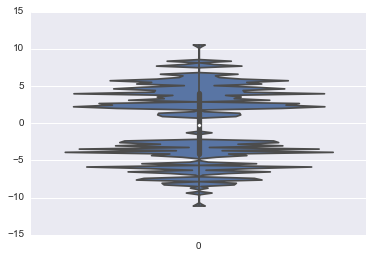

In [84]:
# Wow, quite revealing!
# We can also change the bandwidth of the kernel used for the density fit of the violin plots if desired
sns.violinplot(data=data2,bw=0.01)

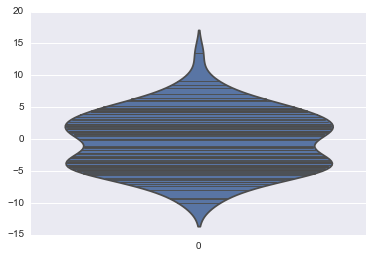

In [85]:
# Much like a rug plot, we can also include the individual points, or sticks
sns.violinplot(data=data1,inner="stick")

# Regression Plots

In [86]:
##the normal imports
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

#stats
from scipy import stats

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#command so that plots appear in the ipython notebool
%matplotlib inline

In [87]:
# Now we'll learn how ot visualize multiple regression with lmplot()

# Luckily, Seaborn comes with an example dataset to use as a pandas DataFrame
tips=sns.load_dataset('tips')

In [89]:
# Preview
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


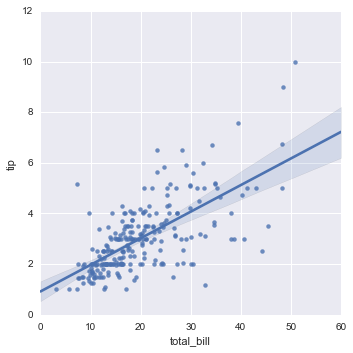

In [90]:
# Let's use lmplot() to plot the total bill versus tips
sns.lmplot("total_bill","tip",tips)

In [91]:
# First we can see a scatter plot of all the points, tip vs total_bill
# Then we see a linear regression line, which is an estimateed linear fit model to the data

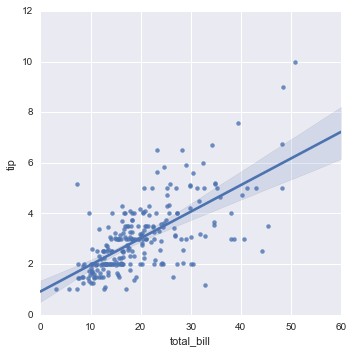

In [93]:
# WE can also specify teh confidence interval to use for the linear fit

sns.lmplot("total_bill","tip",tips,ci=95) # 95% ci 

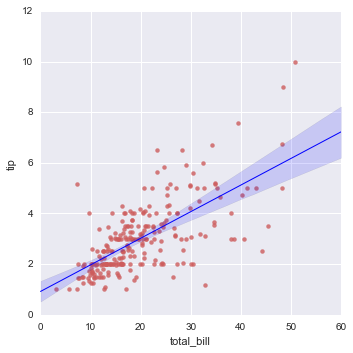

In [94]:
# Just like before, we can use dictionaries to edit individual parts of the plot

sns.lmplot("total_bill", "tip", tips,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

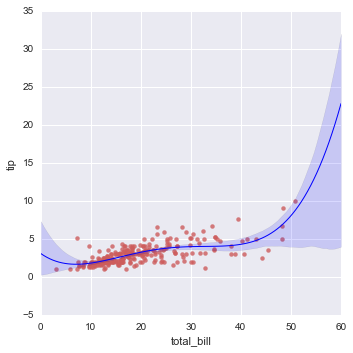

In [95]:
# WE can also check out higher-order trends
sns.lmplot("total_bill", "tip", tips,order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

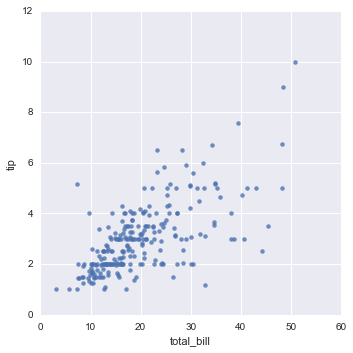

In [96]:
# We can also not fit a regression if desired
sns.lmplot("total_bill", "tip", tips,fit_reg=False)

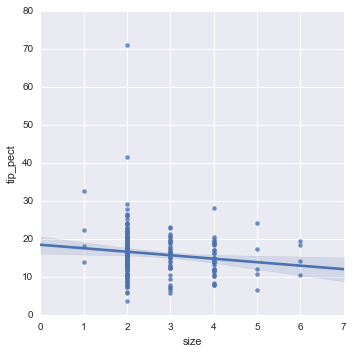

In [97]:
# lmplot() also works on discrete variables, such as the percentage of the tip

# Create a new column for tip percentage
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])

#plot
sns.lmplot("size", "tip_pect", tips);

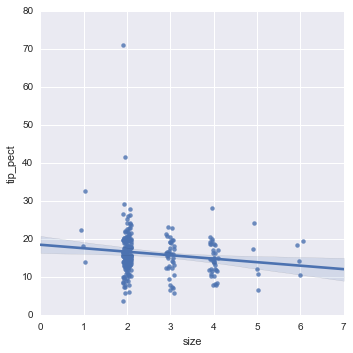

In [98]:
# We can also add jitter to this

#Info link
url = "http://en.wikipedia.org/wiki/Jitter"

#plot
sns.lmplot("size", "tip_pect", tips,x_jitter=.1);

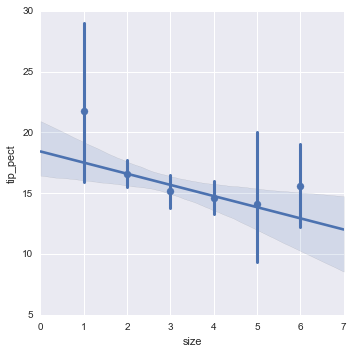

In [99]:
# We can also estimate the tendency of each bin (size of party in this case)
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);

In [100]:
# Interesting, looks like there is more variance for party sizes of 1 then 2-4

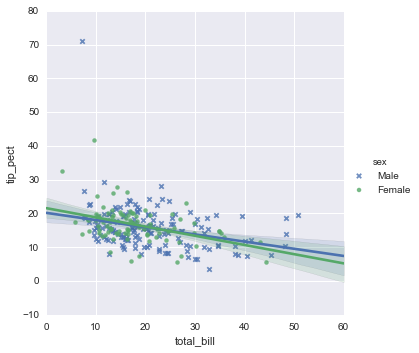

In [101]:
# We can use the hue facet to automatically define subsets along a column

# Plot, note the markers argument
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

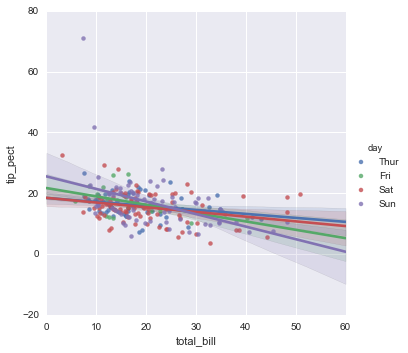

In [102]:
# Does day make a difference?
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

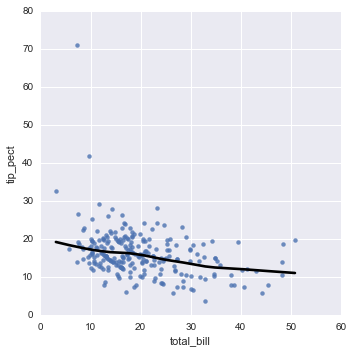

In [103]:
# Finally it should be noted that Seabron supports LOESS model fitting
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

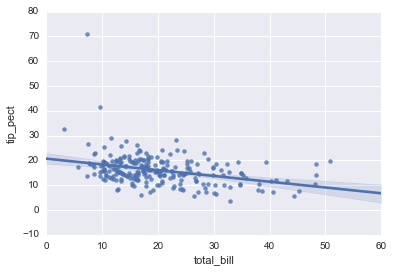

In [104]:
# The lmplot() we've been using is actually using a lower-level function, regplot()

sns.regplot("total_bill","tip_pect",tips)

# Heatmaps and Cluster Matrices

In [113]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [114]:
# Again seaborn comes with a great dataset to play and learn with
flight_dframe = sns.load_dataset('flights')

In [115]:
#Preview
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [116]:
# Let's pivot this dataframe do its easier to manage
flight_dframe = flight_dframe.pivot("month","year","passengers")

#Show
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


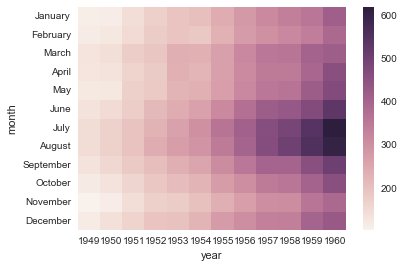

In [117]:
# This dataset is now in a clear format to be dispalyed as a heatmap
sns.heatmap(flight_dframe)

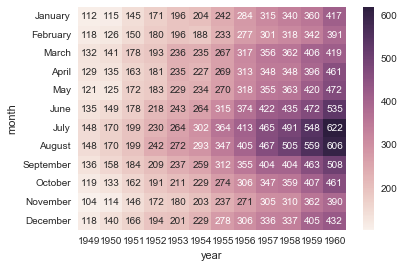

In [118]:
# We also have the option to annotate each cell
sns.heatmap(flight_dframe,annot=True,fmt='d')

In [119]:
# seaborn will automatically try to pick the best color scheme for your dataset, whether is be diverging or converging colormap

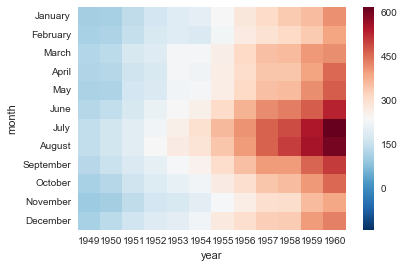

In [120]:
# We can choose our own 'center' for our colormap
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

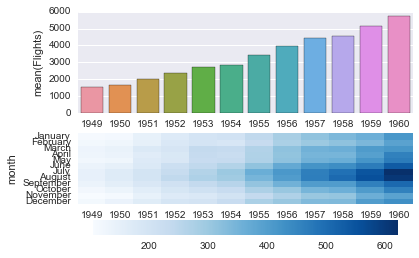

In [121]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']



# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

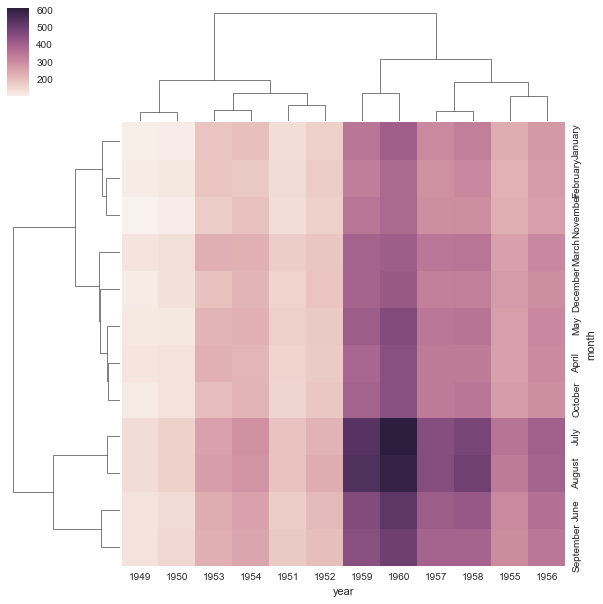

In [122]:
# Finally we'll learn about using a clustermap

# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe)

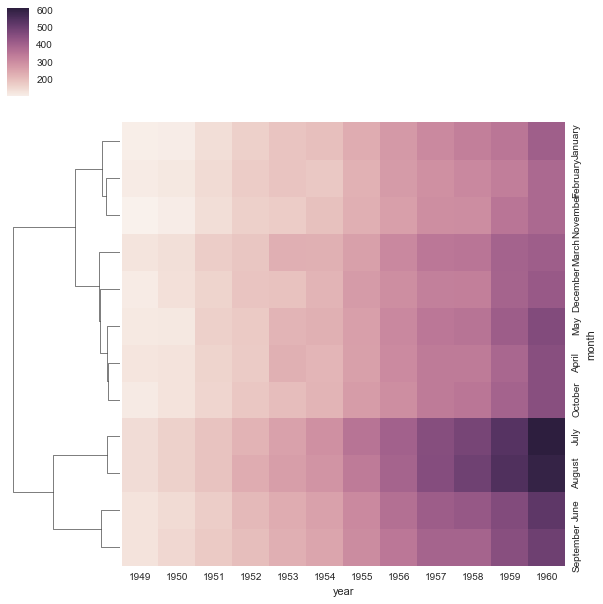

In [123]:
# Let's uncluster the columns
sns.clustermap(flight_dframe,col_cluster=False)

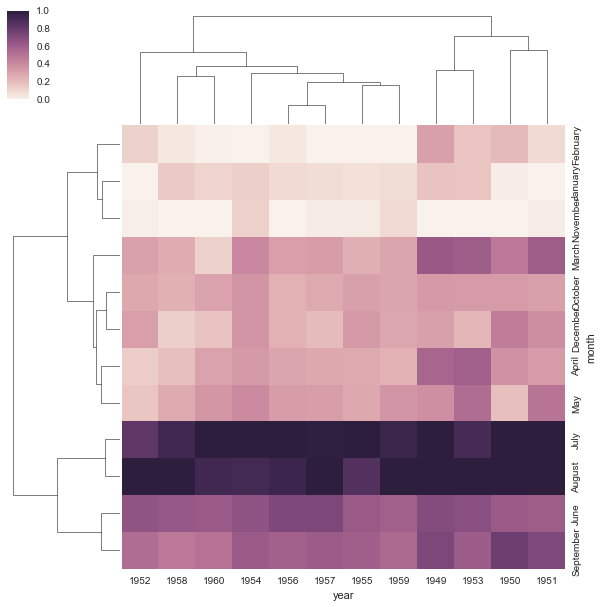

In [124]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1) # standardize by columns (year)

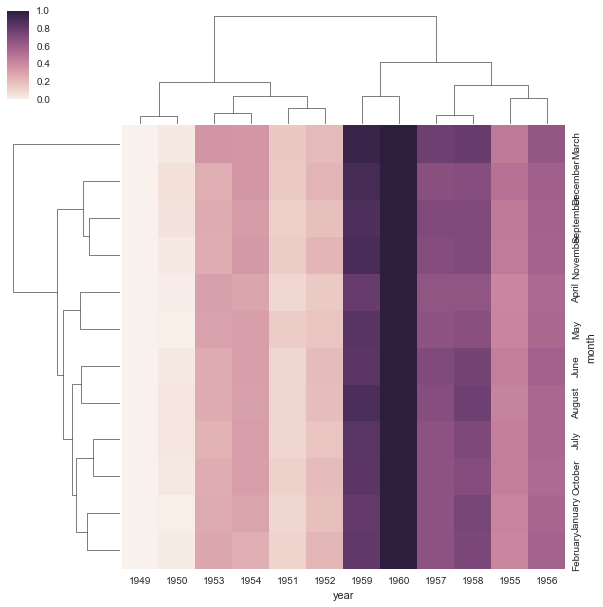

In [125]:
# Or scale the rows
sns.clustermap(flight_dframe,standard_scale=0)

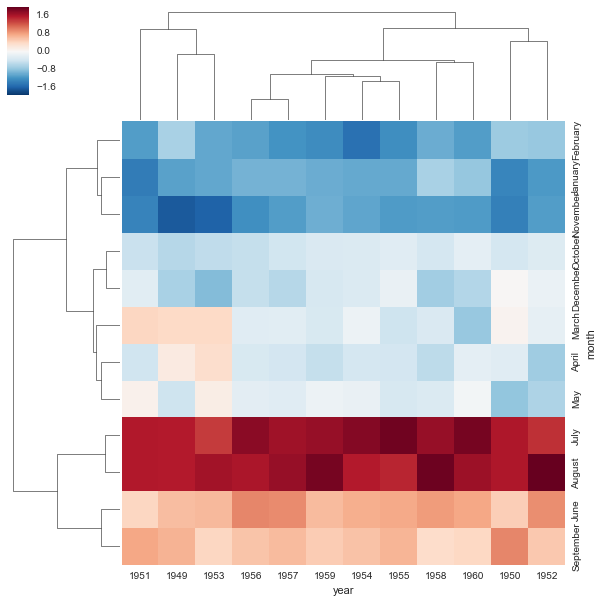

In [126]:
# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe,z_score=1)

In [127]:
# Above we can see which values are greater than the mean and which are below very clearly